<a href="https://colab.research.google.com/github/colingeraghtyCUNYGC/Perceived-comfort-speaking-about-anxiety-or-depression/blob/main/Happiness!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

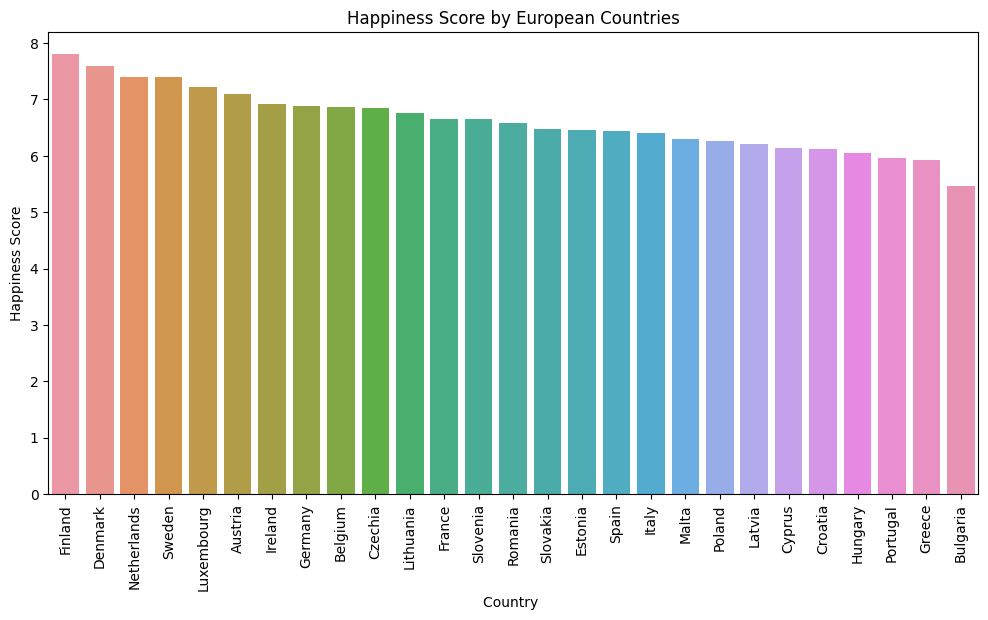

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data = pd.read_excel('EUWHR.xlsx')
plt.figure(figsize=(12,6))
sb.barplot(x='Country ', y='Ladder score (Happiness Score)', data=data)
plt.xlabel('Country ')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by European Countries')
plt.xticks(rotation=90)
plt.show()







In [3]:
EUWHR = pd.read_excel('EUWHR.xlsx')
EUCOMFORT = pd.read_excel('EUCOMFORT.xlsx')





In [5]:
MergedData = pd.merge(left=EUWHR, right=EUCOMFORT, left_on='Country ', right_on='Country ')







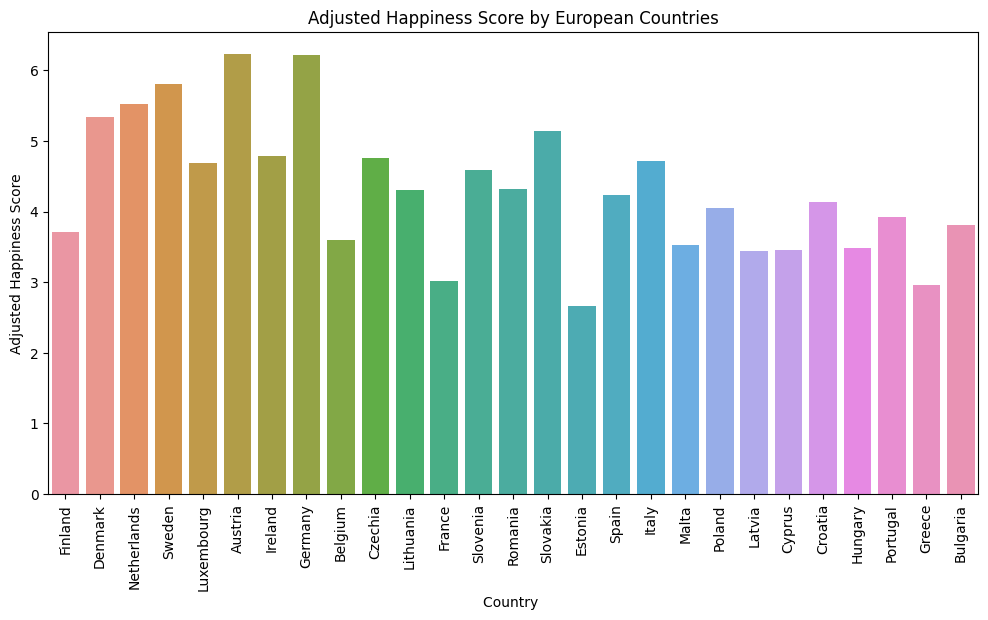

In [9]:
# Calculate the deduction for each country
MergedData['deduction'] = MergedData['Ladder score (Happiness Score)'] * (MergedData['Comfort talking about anxiety or depression'] / 100)

# Subtract the deduction from the Ladder score to get the adjusted score
MergedData['Adjusted Score'] = MergedData['Ladder score (Happiness Score)'] - MergedData['deduction']

plt.figure(figsize=(12,6))
sb.barplot(x='Country ', y='Adjusted Score', data=MergedData)
plt.xlabel('Country ')
plt.ylabel('Adjusted Happiness Score')
plt.title('Adjusted Happiness Score by European Countries')
plt.xticks(rotation=90)
plt.show()


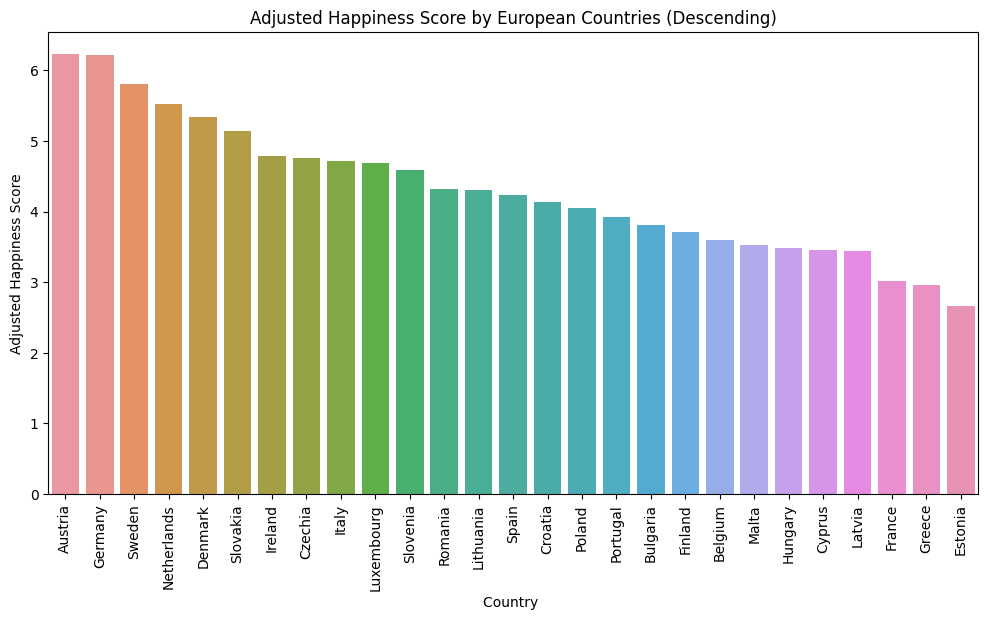

In [12]:
# Sort the MergedData dataframe based on 'Adjusted Score' in descending order
sorted_data = MergedData.sort_values(by='Adjusted Score', ascending=False)

plt.figure(figsize=(12,6))
sb.barplot(x='Country ', y='Adjusted Score', data=sorted_data)
plt.xlabel('Country ')
plt.ylabel('Adjusted Happiness Score')
plt.title('Adjusted Happiness Score by European Countries (Descending)')
plt.xticks(rotation=90)
plt.show()



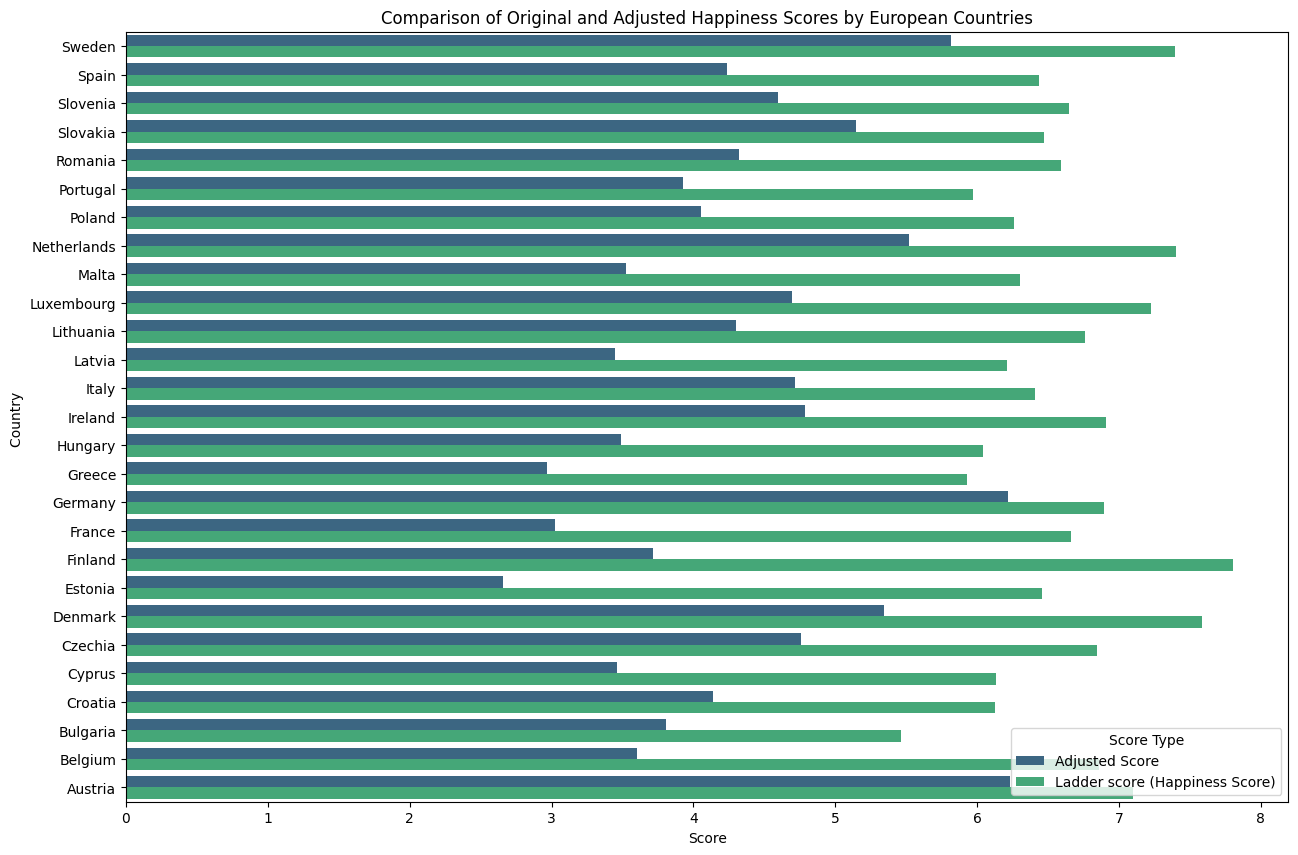

In [15]:
melted_data = MergedData.melt(id_vars='Country ', value_vars=['Ladder score (Happiness Score)', 'Adjusted Score'],
                              var_name='Score Type', value_name='Score')

# Sort the melted data by the original 'Ladder score (Happiness Score)'
melted_data = melted_data.sort_values(by=['Country ', 'Score Type'], ascending=[False, True])

plt.figure(figsize=(15,10))
sb.barplot(x='Score', y='Country ', hue='Score Type', data=melted_data, orient='h', palette="viridis")
plt.xlabel('Score')
plt.ylabel('Country ')
plt.title('Comparison of Original and Adjusted Happiness Scores by European Countries')
plt.show()